# Numerical Integration

[Acknowledgments](#Acknowledgments)

Many physics problems require us to compute integrals. In this notebook we will explore numerical integration via several different methods, practicing our plotting and numpy skills along the way.

In [121]:
import numpy as np
import matplotlib.pyplot as plt

## A simple definite integral

We will start with the equation

$$ f(x) = x^3 - 3x + 5 $$

which you can, of course, integrate analytically. 

&#128310; *By hand* (i.e., not by Mathematica, not by Google, etc.) evaluate the integral of $f(x)$ from $a = 0$ to $b = 2$. Report your answer here.

$$ \int_{a}^{b} f(x) dx = \int_{a=0}^{b=2} x^3 - 3x +5 dx = \left[ \frac{1}{4}x^4 - \frac{3}{2}x^2 +5x \right]_0^2 $$
$$ = (\frac{16}{4} - \frac{12}{2} + 10) - (0 - 0 + 0) = \boxed{8} $$

&#128309; To integrate our function numerically, we will start by writing a function `f` that evaluates the expression $f(x)$. Write your function below.

In [140]:
def my_function(x):
    return (x**3 - 3*x + 5)

print("input of 0 should be 5: ", my_function(0)) # should be 5
print("input of 2 should be 7: ", my_function(2)) # should be 8 - 6 + 5 = 7

input of 0 should be 5:  5
input of 2 should be 7:  7


A crude way to evaluate our integral numerically would be to sum up N rectangles centered on $f(x_i)$, for $x_i$ in the range $[a, b]$. 

In [123]:
N = 5
a = 0.0
b = 2.0
h = (b-a)/N # step size for N steps from a to b

# Evaluate the integral at x = a
s = my_function(a)

# For each step k, evaluate the integral at x_i
for k in range(1, N+1):
    x_i = a + k*h

    # The += operator is handy for accumulating values. a += 2 is equivalent to a = a + 2.
    s += my_function(x_i)

integral_rectangles = s*h
print(integral_rectangles)

10.560000000000002


&#128310; Comment on the difference between your analytic solution and the numerical solution evaluated by summing N rectangles. Is the numerical solution an overestimate or an underestimate of the true value? Comment on whether you expected this. *Hint: think about the shape of the equation you are integrating in the range you are integrating it.*

The numerical estimate is an overestimate. We might expect this because our function increasing for a larger part in the range than it is decreasing. As a result, the right hand rectangles that we're drawing (using the large value) overestimates the real integral because we usually take a larger value than the average of the region. 

## The Trapezoidal Rule

The trapezoidal rule is a slight modification to the above that improves the accuracy of our numerical integration. Instead of summing rectangles, let's sum trapezoids. If we divide the interval from $a$ to $b$ into $N$ slices, each slice has width $(b - a)/N$. The right-hand side of the $k^\mathrm{th}$ slice falls at $a + kh$, and the left-hand side falls at $a + hk - h = (k-1)h$. Thus the area of the trapezoid for this slice is 

$$A_k = \frac{1}{2}h \left[f(a + (k-1)h) + f(a + kh)\right]$$

This approximates the area under one slice of our function as a trapezoid. Extending this to the entire integral from $a$ to $b$, we find

$$\int_a^b f(x) \approx \frac{1}{2}h \sum_{k = 1}^{N} \left[f(a + (k-1)h) + f(a + kh)\right] = h\left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1}f(a + kh)\right]$$



&#128309; Use the trapezoidal rule to integrate your function `f(x)` using a for loop through each slice `k`.

In [124]:
N = 10
a = 0.0
b = 2.0
h = (b-a)/N # step size for N steps from a to b

# Evaluate the integral at x = a and x = b
s = 0.5*my_function(a) + 0.5*my_function(b)

# For each step k, evaluate the integral at x_i
for k in range(1, N): # note range fn is not inclusive of last value
    x_i = a + k*h

    # The += operator is handy for accumulating values. a += 2 is equivalent to a = a + 2.
    s += my_function(x_i)

integral_trapezoid = s*h
print(integral_trapezoid)

8.040000000000001


&#128310; Comment on the difference between your analytic solution to the integral and your numerical solution. What are the relevant sources of error in your computational solution? Try different values for `N` and comment on how the solution changes.

Our numerical solution is again an overestimate compared to our analytic solution. This might be because we aren't considering the concavity of the solution. Because we have a solution with a curve, that is primarily concave up increasing, we're overestimating by drawing straight lines for each trapezoidal component. 

When we increase our N value, our solution becomes closer to the analytic solution. For $N = 5$, we get $8.16$, while for $N=10$, we get $8.04$.

&#128309; Numpy has a function called `trapz`. Use it to numerically integrate and compare to your own trapezoidal rule implementation. Do you get the same output? 

In [125]:
N = 10
a = 0.0
b = 2.0
h = (b-a)/N # step size for N steps from a to b

heights = []

for k in range(1, N+1): # note range fn is not inclusive of last value
    x_i = a + k*h

    heights.append(my_function(x_i))

integral_np_trapz = np.trapz(heights, dx = h)
print(integral_np_trapz)

7.099200000000001


I did not get the same value. This should be related to the indexing. Here we are not adding in the function evaluated at the exact bounds while previously we were adding the heights of each slice to the function at a and at b. 

## Replacing For Loops with Numpy Arrays

In the calculation we did above, we stepped through each item in our sum via a for loop. In previous notebooks, you may have done something similar, and if you wanted to store the output at each step (e.g., the cumulative sum as a function of number of steps), you may think of using a list to append new values at every step. These are operations that are available in pure Python, but having to loop through data and perform operations step by step can be quite inefficient. 

Replacing for loops with array operations can be a powerful way to speed up our code. Speeding up our code, in turn, allows us to tackle much larger datasets than we otherwise could. Writing calculations as manipulations of arrays, rather than as loops through individual elements, is called **vectorization**. Numpy allows us to do array-based calculations that are highly optimized and, under the hood, are written in compiled languages like C. Judiciously replacing some of your for loops with numpy arrays may take some getting used to, but it will be worth it!

&#128309; Let's test this by implementing two functions that each return the square of the first 1000 integers. The first will be implemented using a for loop and a list, and the second will be implementing using numpy arrays.

In [126]:
# Write a function func1 that loops through 1000 values and appends each value^2 to a list.
def func1():
    func1_list = []
    for i in range(1000):
        func1_list.append(i**2)
    return func1_list

# Write a function func2 that uses numpy to create an array of 1000 values and returns the array squared.
def func2(): 
    func2_list = np.arange(1, 1001)
    return np.square(func2_list)
    

We can evaluate the performance of our two functions using the built-in, "magic" function `timeit`. Run the cell below.

In [127]:
%timeit func1()
%timeit func2()

51.5 µs ± 74.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.52 µs ± 0.927 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


&#128310; What sort of speedup in performance did `func2` achieve relative to `func1`? Discuss your results. 

Here, func1 waas almost 35x slower than func2. This makes sense as we're using numpy which specifies low level operations and finds computational improvements specific to hardware. It is interesting that the standard deviation is also far lower for func2. 

&#128309; Rewrite your implementation of the trapezoidal rule using numpy arrays. Hint: you do not need to rewrite the function `f`. You will replace your for loop of steps with a numpy array, and apply `f` to that array. You may want to make use of the numpy function `linspace` that we encountered in the Introduction notebook.

In [128]:
N = 100
a = 0.0
b = 2.0

steps = np.linspace(a, b, N)
heights = steps**3 - 3*steps + 5
integral = np.trapz(heights, dx = (b-a)/N)
print(integral)

7.920404040404041


While you are getting the hang of array-based programming, it will often be helpful to code up what you want to do with for loops, or write for-loop-based pseudocode, and then translate to numpy arrays. 

## Visualizing our Numerical Integrals

To visualize our numerical integrals, we will first plot the function $f(x)$ by computing `f(x)` on a finely spaced grid of $x$ values. Then we will visualize our trapezoidal rule approximation of the integral using the function `plt.fill_between`. Put your code between the commented code outline below.

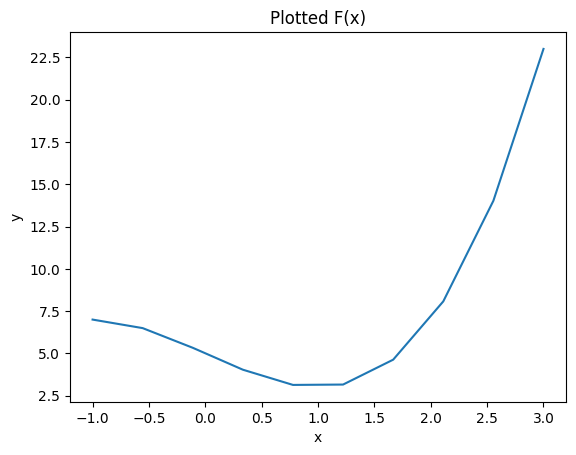

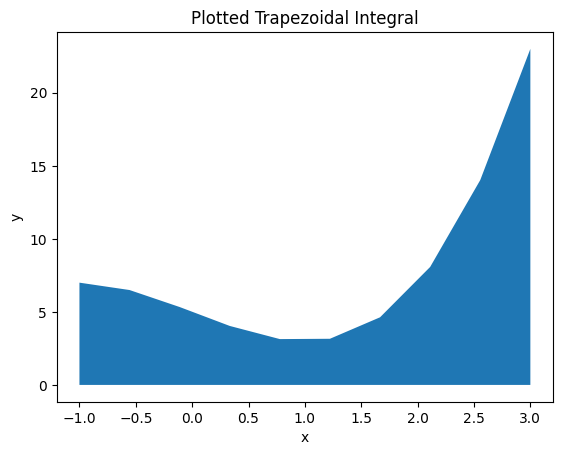

In [142]:
N = 10
a = 0.0
b = 2.0

# Define a finely spaced grid of x values for plotting purposes. 
# The range of these values should be somewhat larger than your bounds of integration [a, b].
x_axis = np.linspace(a-1, b+1, N)

# Plot the function f(x) evaluated on your finely spaced grid. 
plt.plot(x_axis, my_function(x_axis))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotted F(x)")
plt.show()

# Plot your trapezoidal approximation to the integral from a=0 to b=2, using N = 5.
# To do this, you will define the points where your trapezoidal approximation is evaluated, and then use plt.fill_between.
plt.fill_between(x_axis, my_function(x_axis))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotted Trapezoidal Integral")
plt.show()


## Simpson's Rule

Let's say we find ourselves needing to evaluate an integral with a higher level of accuracy than we get with the trapezoidal rule. The trapezoidal rule approximates the area under our curve with a series of line segments. What if we instead approximated each "chunk" with curves? Simpson's rule is precisely this: we'll fit a quadratic curve, rather than a straight line, to each chunk. To approximate a chunk with a quadratic, we'll need 3 points at a time, rather than 2. 

Let's walk through the calculation of a single chunk of integral with Simpson's rule. We will integrate $f(x)$ for a chunk centered at $x = 0$ that extends from $x = -h$ to $x = h$. If we fit a quadratic $A x^2 + Bx + C$ through these three points, that quadratic definitionally has:

$$f(-h) = Ah^2 -Bh + C$$
$$f(0) = C$$
$$f(h) = Ah^2 + Bh + C$$

Take a moment to convince yourself of the above on a piece of scrap paper, and show that solving the above equations simultaneously gives

$$A = \frac{1}{h^2} \left[\frac{1}{2} f(-h) - f(0) + \frac{1}{2}f(h)\right]$$
$$B = \frac{1}{2h} \left[f(h) - f(-h) \right]$$
$$C = f(0)$$

Integrate the quadratic from $-h$ to $h$ and plug in, and we find

$$\int_{-h}^{h} (Ax^2 + Bx + C)dx = \frac{2}{3}Ah^3 + 2Ch = \frac{1}{3}h\left[f(-h) + 4f(0) + f(h)\right]$$

Congratulations! You have just derived **Simpson's Rule**, a higher-order numerical integration scheme that is quite useful: fairly accurate while still being simple and fast. Before we code this up, there is one more thing to notice: when we chunk our integral up into $N$ regions, Simpson's Rule fits a quadratic to two chunks at a time -- in other words, $N$ needs to be even because we step by two's through the integral. The Simpson's Rule approximation of the entire integral is

$$\int_a^b f(x) \approx \frac{1}{3} h \left[ f(a) + f(b) + 4 \sum_{1,~\mathrm{odd}~k}^{N -1} f(a + kh) + 2 \sum_{2,~\mathrm{even}~k}^{N-2} f(a + kh) \right]$$



&#128309; Write a function called `simpsons` that integrates a given function via Simpson's Rule. 

In [130]:
def simpsons(func, a, b, N): 

    s = func(a) + func(b) # start with the bounds not including in loop
    h = (b-a)/N # step size for N steps from a to b

    for k in range(1, N):
        x_i = a + k*h
        
        if k % 2 != 0: s += 4*func(x_i) # for odd k, add 4*f(x)

    for k in range(2, N-1):
        x_i = a + k*h

        if k % 2 == 0: s += 2*func(x_i) # for even k, add 2*f(x)

    return (1/3)*h*s

&#128309; Once again, integrate your function `f(x)` from 0 to 2, this time using your function `simpsons`.

In [143]:
simpsons(my_function, 0, 2, 10)
# We expect the integral to be close to 8. 

8.0

&#128310; Comment on the integral evaluated with Simpson's Rule. For a given `N`, how does the integral evaluated with the Trapezoidal Rule compare to the integral evaluated with Simpson's Rule? 

This works considerably better, but note we do need to consider only even values for N. Compared to the Trapezoid rule that gave us 8.04 for N=10, the Simpson's rule is giving us exactly 8.0 (up to float limit of course). 

&#128309; Define a new function to integrate. Make it something funky and wiggly! Plot your function. Choose your bounds of integration and integrate your function using both the trapezoidal rule and Simpson's rule, experimenting with multiple step sizes. 

In [132]:
def new_func(x):
    return x*np.sin(np.cos(x**2)) # new function is:      x*sin(cos(x^2))

# define a formal function for trapezoidal integration
def trapezoid(x):
    result = np.zeros(len(x)) 
    for index in range(len(x)): 
        result[index] = np.trapz(new_func(x[:index])) # do each integral and store every value in result
    return result

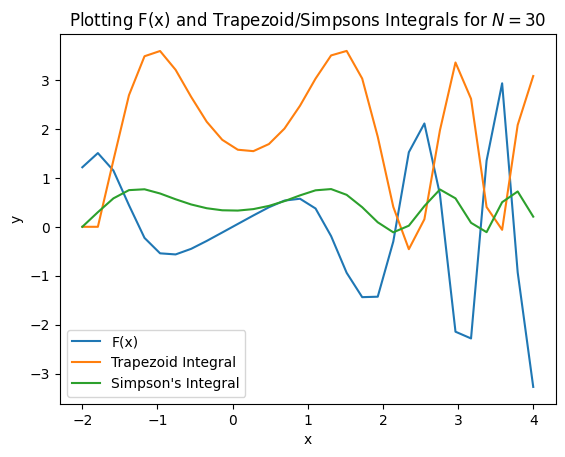

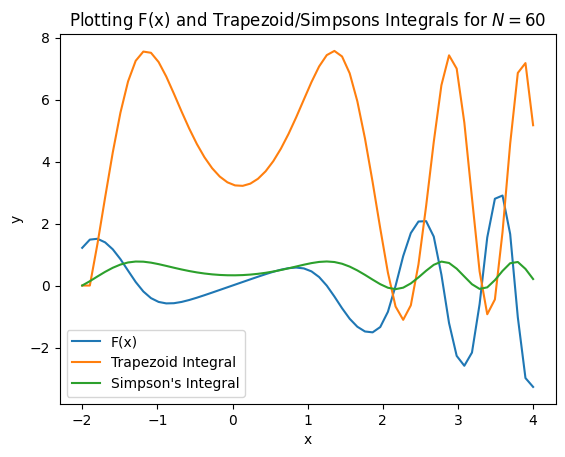

In [133]:
N1 = 30 
N2 = 60
a = -1.0 # lower bound
b = 3.0 # upper bound

# For N = 30

x_axis1 = np.linspace(a-1, b+1, N1)

plt.plot(x_axis1, new_func(x_axis1), label="F(x)") # plot base function
plt.plot(x_axis1, trapezoid(x_axis1), label="Trapezoid Integral") # plot trapezoid integral
plt.plot(x_axis1, simpsons(new_func, x_axis1[0], x_axis1, N1), label="Simpson's Integral") # plot simpson's integral

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting F(x) and Trapezoid/Simpsons Integrals for $N=30$")

plt.legend()
plt.show()

# For N = 60

x_axis2 = np.linspace(a-1, b+1, N2)

plt.plot(x_axis2, new_func(x_axis2), label="F(x)")
plt.plot(x_axis2, trapezoid(x_axis2), label="Trapezoid Integral")
plt.plot(x_axis2, simpsons(new_func, x_axis2[0], x_axis2, N2), label="Simpson's Integral")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting F(x) and Trapezoid/Simpsons Integrals for $N=60$")

plt.legend()
plt.show()


## Application to the diffraction limit of a telescope

Telescope observations have a fundamental resolution limit set by the diffraction of light. When light with wavelength $\lambda$ passes through the circular aperature of a telescope with diameter $D$, the intensity of light in the focal plane is described by a diffraction pattern (also called the point spread function of diffraction). The intensity on the focal plane follows the pattern

$$ I(r) = \left(\frac{2 J_1(k r)}{kr} \right)^2 $$

where $k = \frac{D \pi}{\lambda}$, $r$ is angular the distance from the center of the focal plane in radians, and $J_1(x)$ is a Bessel function given by

$$ J_m (x) = \frac{1}{\pi} \int_0^\pi \cos(m\theta - x\sin \theta) d\theta $$

&#128309; Write a function `J(m, x)` that calculates the value of $J_m(x)$ using Simpson's rule with N = 1000 points. 

In [134]:
def J(m, x): 
    # define a new function to evaluate the integrand using m and x
    def integrand(theta): 
        return np.cos(m*theta - x*np.sin(theta))
    
    return (1/np.pi)*(simpsons(integrand, 0, np.pi, N=1000)) # use defined integrand function 

&#128309; Use your function to make a single plot showing the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$. Label your Bessel functions using `plt.legend`.

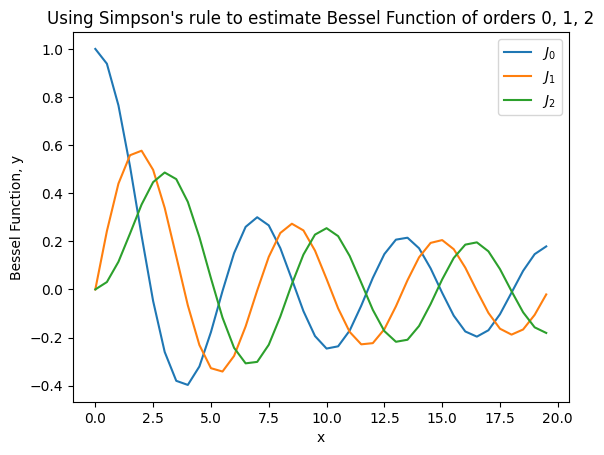

In [135]:
x_vals = np.arange(0, 20, 0.5)

# plot each value of Bessel Function
plt.plot(x_vals, J(0, x_vals), label="$J_0$")
plt.plot(x_vals, J(1, x_vals), label="$J_1$")
plt.plot(x_vals, J(2, x_vals), label="$J_2$")

# make graph pretty
plt.xlabel("x")
plt.ylabel("Bessel Function, y")
plt.title("Using Simpson's rule to estimate Bessel Function of orders 0, 1, 2")

# plot and show legend
plt.legend()
plt.show()

&#128309; Import `scipy` and plot one of your Bessel functions using `scipy.special.jv` (scipy's implementation of the Bessel function). Plot the Bessel function computed with your function using a solid linestyle, and overplot scipy's version of the Bessel function using a dashed linestyle (`ls = '--'`). Do the results agree? 

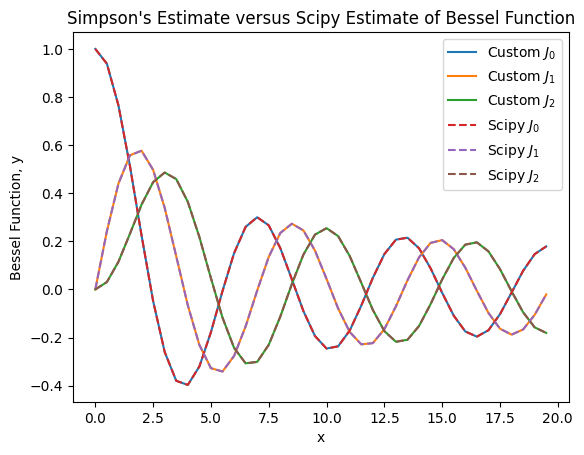

In [136]:
import scipy

# Plot Custom Bessel Functions
plt.plot(x_vals, J(0, x_vals), label="Custom $J_0$")
plt.plot(x_vals, J(1, x_vals), label="Custom $J_1$")
plt.plot(x_vals, J(2, x_vals), label="Custom $J_2$")

# Plot Scipy Bessel Functions
plt.plot(x_vals, scipy.special.jv(0, x_vals), label=f'Scipy $J_{0!r}$', ls = "--")
plt.plot(x_vals, scipy.special.jv(1, x_vals), label=f'Scipy $J_{1!r}$', ls = "--")
plt.plot(x_vals, scipy.special.jv(2, x_vals), label=f'Scipy $J_{2!r}$', ls = "--")

# make graph pretty
plt.xlabel("x")
plt.ylabel("Bessel Function, y")
plt.title("Simpson's Estimate versus Scipy Estimate of Bessel Function")

# show legend and display graph
plt.legend()
plt.show()

Yes, these results seem to agree! We can see that the two curves for each value of the Bessel function seem to be overlapping and hence are evaluting to the same value for each x_val.

&#128309; Use your implementation of the Bessel function to compute and plot the 2D intensity distribution of the circular diffraction pattern of a point source with $\lambda = 500$ nm in a $2 \mu\mathrm{m}$ x $2 \mu\mathrm{m}$ square region of the focal plane, for a telescope with $D = 2$ meters.

**Hint:** Be sure to pick a unit to work in for this problem and stick with it. I recommend meters. The comments below will help you structure your code. 

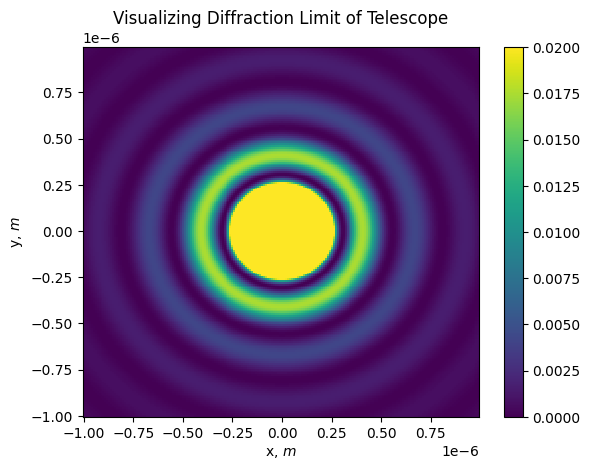

In [137]:
# Define a grid of values representing coordinates in your focal plane using np.meshgrid. 
x = np.arange(-1*10**(-6), 1*10**(-6), 10**(-8)) # 200 datapoints from -1 --> 1
y = np.arange(-1*10**(-6), 1*10**(-6), 10**(-8)) # 200 datapoints from -1 --> 1
X, Y = np.meshgrid(x, y)

# Define the center of your focal plane. 
center = (0, 0)

# Compute a square array that represents the distance from the center of the focal plane for every point in your focal plane.
dist_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

# Evaluate the equation above for your array of distances from the center of the focal plane. 
def intensity(r): 
    k = 2*np.pi /(500*10**(-9))
    return ((2*J(1, k*r))/(k*r))**2 # define intensity function

intensities = intensity(dist_center)

# Plot your diffraction pattern using plt.pcolormesh.
# Add a colorbar using plt.colorbar()
# Note: the central peak is quite bright, so you may need to play with your colorbar limits. 
# plt.colormesh (and plt.imshow) take options vmin and vmax that set the values to map to the extremes of your colorbar. 
# I used vmax=0.02. 

plt.pcolormesh(X, Y, intensities, vmin = 0, vmax = 0.02)
plt.colorbar()

plt.xlabel("x, $m$")
plt.ylabel("y, $m$")
plt.title("Visualizing Diffraction Limit of Telescope")

plt.show()

If you took Physics 15 or another introductory astrophysics course, you learned a simple approximation for the "diffraction-limited" resolution of a telescope with diameter $D$ observing at wavelength $\lambda$: 

$$\theta = 1.22\frac{\lambda}{D}$$

&#128309; Use `plt.Circle` to plot a circle with that radius on your plot, and comment on the results. 

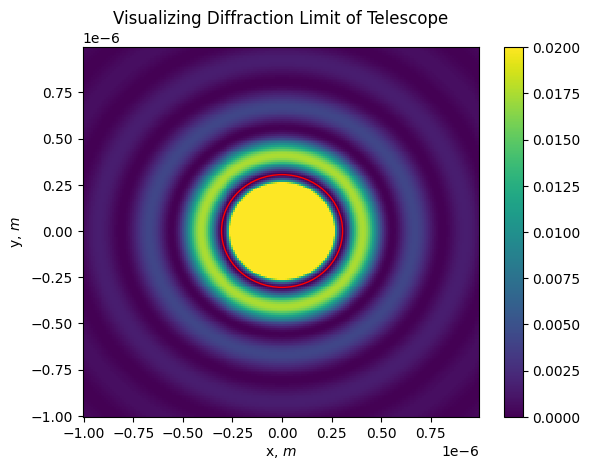

In [138]:
# Plot the existing diffraction
plt.pcolormesh(X, Y, intensities, vmin=0, vmax=0.02)
plt.colorbar()

# make circle with center at 0 and radius of theta
circle_center = (0, 0)
circle_radius = 1.22*(500*10**(-9))/2  # radius = 1.22 * (500 nm) / 2 m

# create circle
circle = plt.Circle(circle_center, circle_radius, color='red', fill=False)
plt.gca().add_patch(circle)

# add labels
plt.xlabel("x, $m$")
plt.ylabel("y, $m$")
plt.title("Visualizing Diffraction Limit of Telescope")

plt.show()

Here we can see that the simple approximation is pretty good! It clearly captures the first ring of the diffraction pattern and pretty roughly aligns with it. Because it's roughly in the center of the diffraction pattern, it likely works for both cases where you're looking for the inner and outer portion of the pattern. 

### Optional fun: 3D plotting 

Play around with the code below to visualize your diffraction pattern in 3D. 

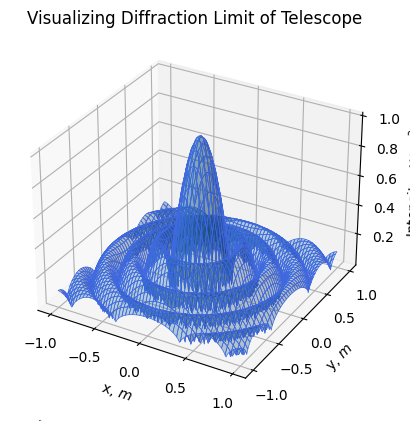

In [139]:
ax = plt.figure().add_subplot(projection='3d')
flattened_intensities = intensities**(0.3) # added a flattening factor of x^0.3 to visualize waves as it goes outward
ax.plot_surface(X, Y, flattened_intensities, edgecolor='royalblue', lw=0.5, alpha=0.3)

# add labels
ax.set_xlabel("x, $m$")
ax.set_ylabel("y, $m$")
ax.set_zlabel("Intensity, $W/m^2$")
plt.title("Visualizing Diffraction Limit of Telescope")

plt.show()


## Acknowledgments

S.E. Clark 2024, with trapezoidal and Simpson's rules discussions and diffraction limit problem all either inspired by or adapted from Newman 2013.
